# Space Missions Analysis

## Introduction and Setup

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

## Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df_data.sample(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2756,2756,2756,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Thu Dec 09, 1976 10:00 UTC",Soyuz U | Cosmos 879,StatusRetired,NaN,Success
3922,3922,3922,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sat Nov 27, 1965 08:20 UTC",Vostok-2 | Cosmos 98,StatusRetired,NaN,Success
885,885,885,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Tue Jan 30, 2007 23:21 UTC",Zenit-3 SL | NSS-8,StatusActive,NaN,Failure
3556,3556,3556,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu May 29, 1969 06:59 UTC",Voskhod | Cosmos 284,StatusRetired,NaN,Success
3505,3505,3505,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Wed Dec 03, 1969 13:20 UTC",Voskhod | Cosmos 313,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

In [9]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [10]:
df_data.duplicated(["Organisation", "Location", "Date", "Detail"]).sum()

1

In [11]:
df_data.drop_duplicates(subset=["Organisation", "Location", "Date", "Detail"], inplace=True)

Consider removing columns containing junk data. 

In [12]:
df_data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

In [13]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [14]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4323 non-null   object
 1   Location        4323 non-null   object
 2   Date            4323 non-null   object
 3   Detail          4323 non-null   object
 4   Rocket_Status   4323 non-null   object
 5   Price           963 non-null    object
 6   Mission_Status  4323 non-null   object
dtypes: object(7)
memory usage: 270.2+ KB


## Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [16]:
no_of_launches_per_company = df_data["Organisation"].value_counts()
no_of_launches_per_company

RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


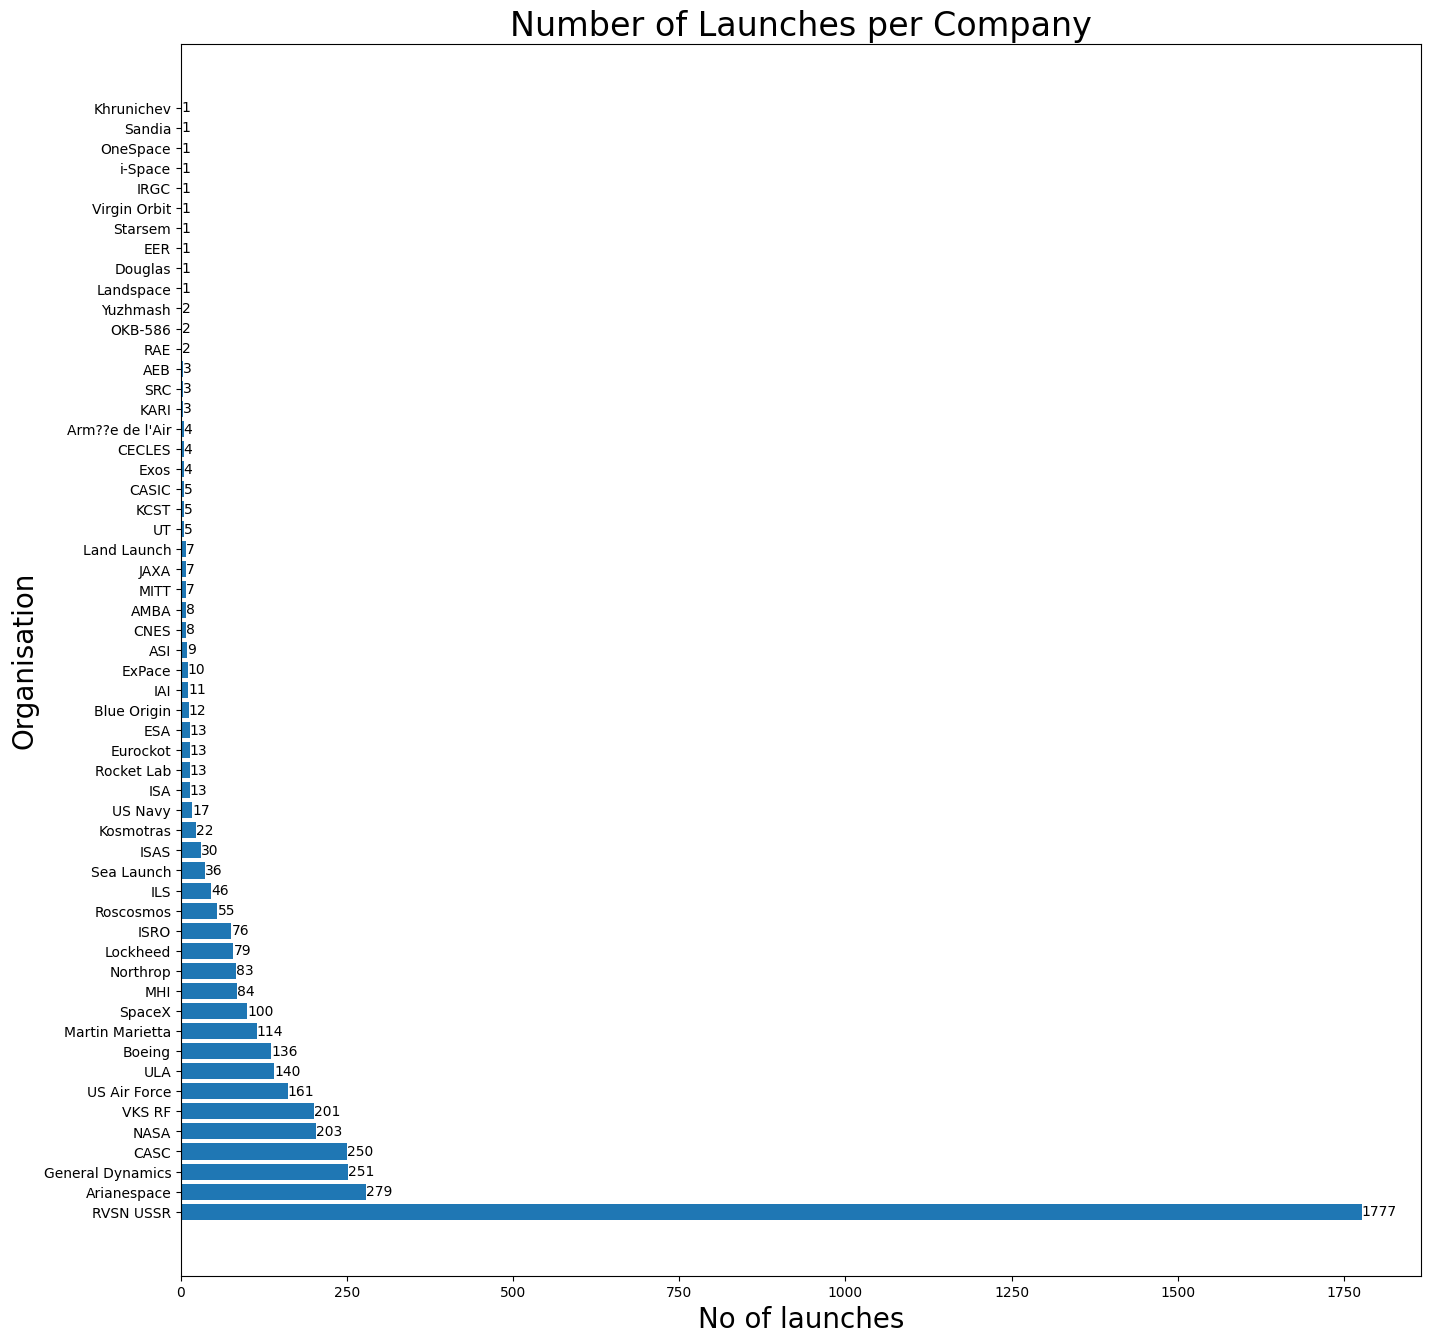

In [17]:
plt.figure(figsize=(16, 16))

plt.xlabel("No of launches", fontsize=20)
plt.ylabel("Organisation", fontsize=20)

plt.title("Number of Launches per Company", fontsize=24)

# Add values inside the bars
for index, value in enumerate(no_of_launches_per_company):
    plt.text(x=value, y=index, s=value, ha='left', va='center')

plt.barh(no_of_launches_per_company.index.values, no_of_launches_per_company.values)

plt.show()

## Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [18]:
no_of_active_vs_retired_rockets = df_data["Rocket_Status"].value_counts()
no_of_active_vs_retired_rockets

StatusRetired    3534
StatusActive      789
Name: Rocket_Status, dtype: int64

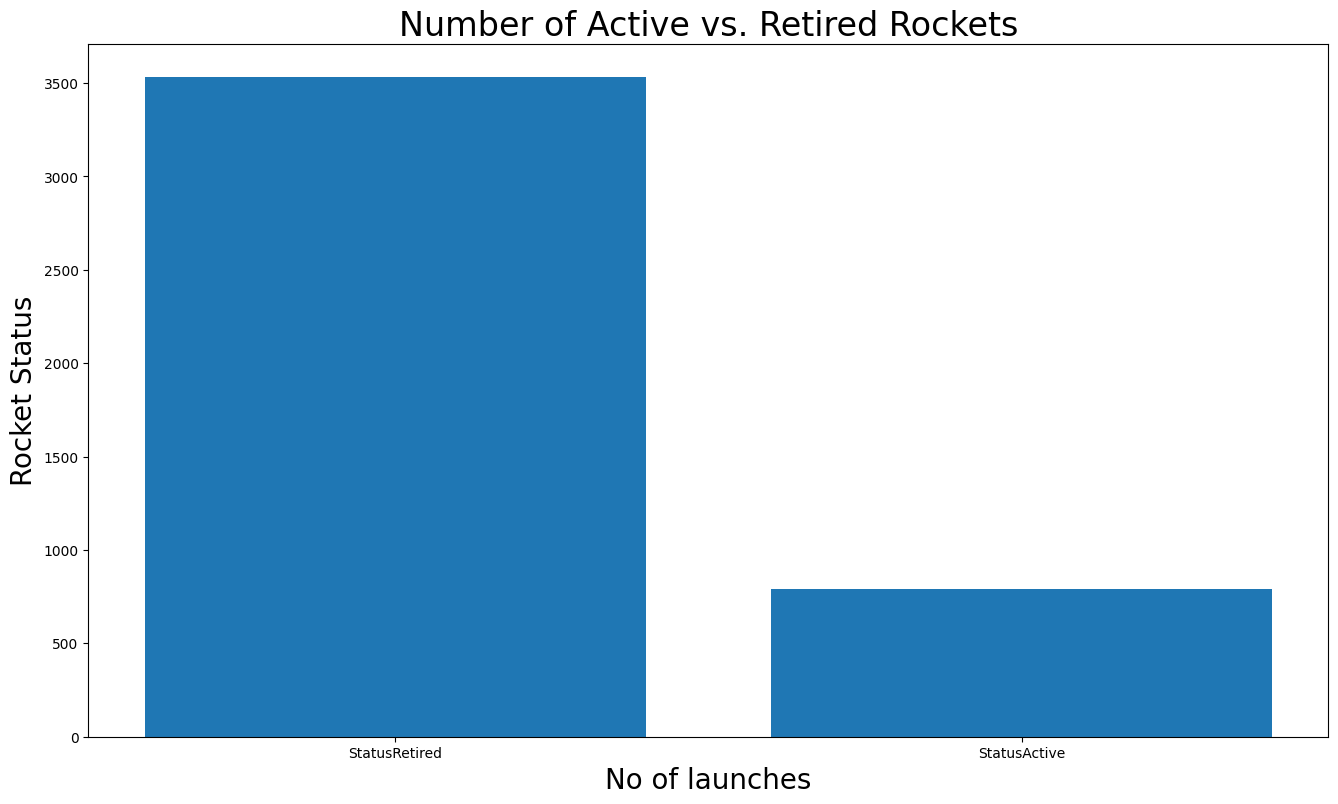

In [19]:
plt.figure(figsize=(16, 9))

plt.xlabel("No of launches", fontsize=20)
plt.ylabel("Rocket Status", fontsize=20)

plt.title("Number of Active vs. Retired Rockets", fontsize=24)

plt.bar(no_of_active_vs_retired_rockets.index.values, no_of_active_vs_retired_rockets.values)

plt.show()

In [20]:
figure = px.pie(df_data, df_data["Rocket_Status"], title="Number of Active vs. Retired Rockets")

figure.show()

## Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [21]:
distribution_of_mission_status = df_data["Mission_Status"].value_counts()
distribution_of_mission_status

Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

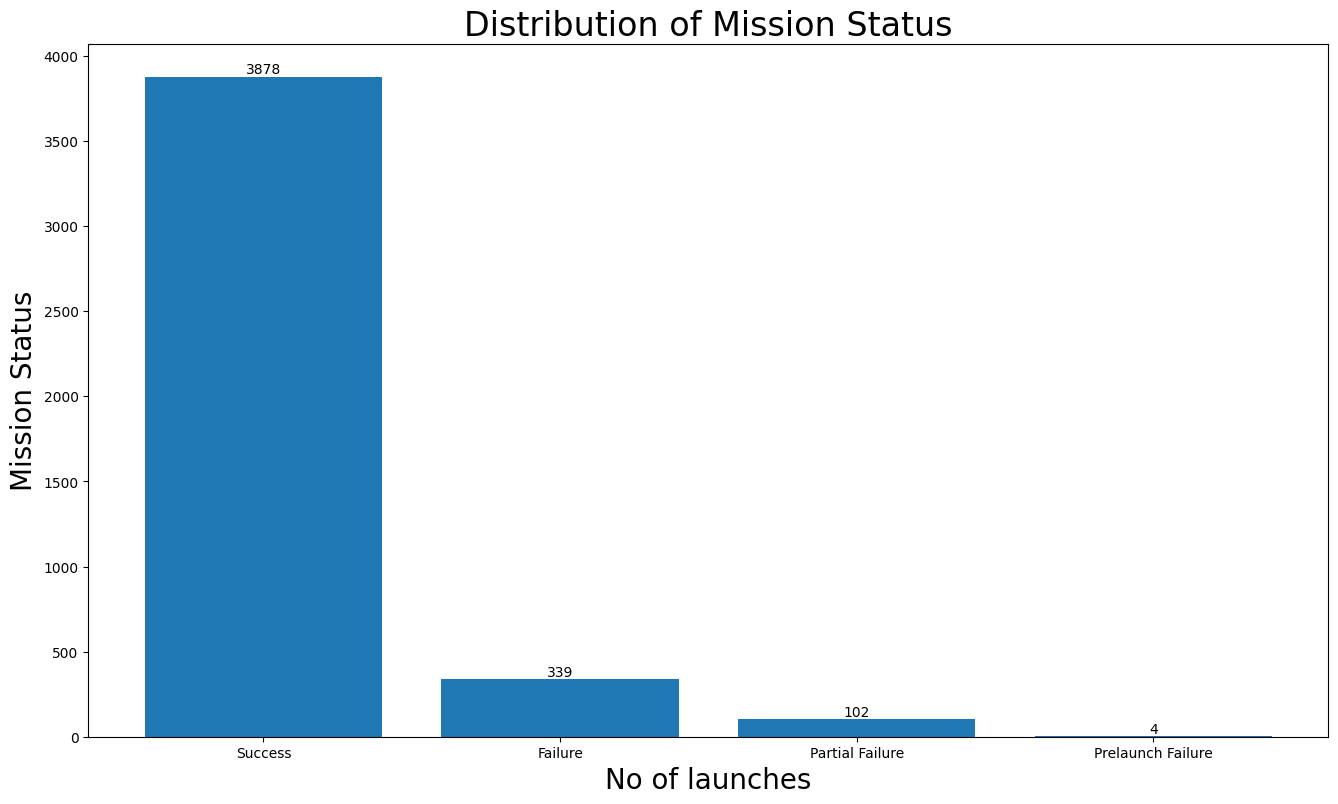

In [22]:
plt.figure(figsize=(16, 9))

plt.xlabel("No of launches", fontsize=20)
plt.ylabel("Mission Status", fontsize=20)

plt.title("Distribution of Mission Status", fontsize=24)

for index, value in enumerate(distribution_of_mission_status):
    plt.text(x=index, y=value, s=value, ha='center', va='bottom')

plt.bar(distribution_of_mission_status.index.values, distribution_of_mission_status.values)

plt.show()

In [23]:
figure = px.pie(df_data, df_data["Mission_Status"], title="Distribution of Mission Status")

figure.show()

## How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [24]:
# convert the prices to numeric
df_data["Price"] = df_data["Price"].str.replace(",", "")

df_data["Price"] = pd.to_numeric(df_data["Price"])

prices = df_data["Price"].dropna()

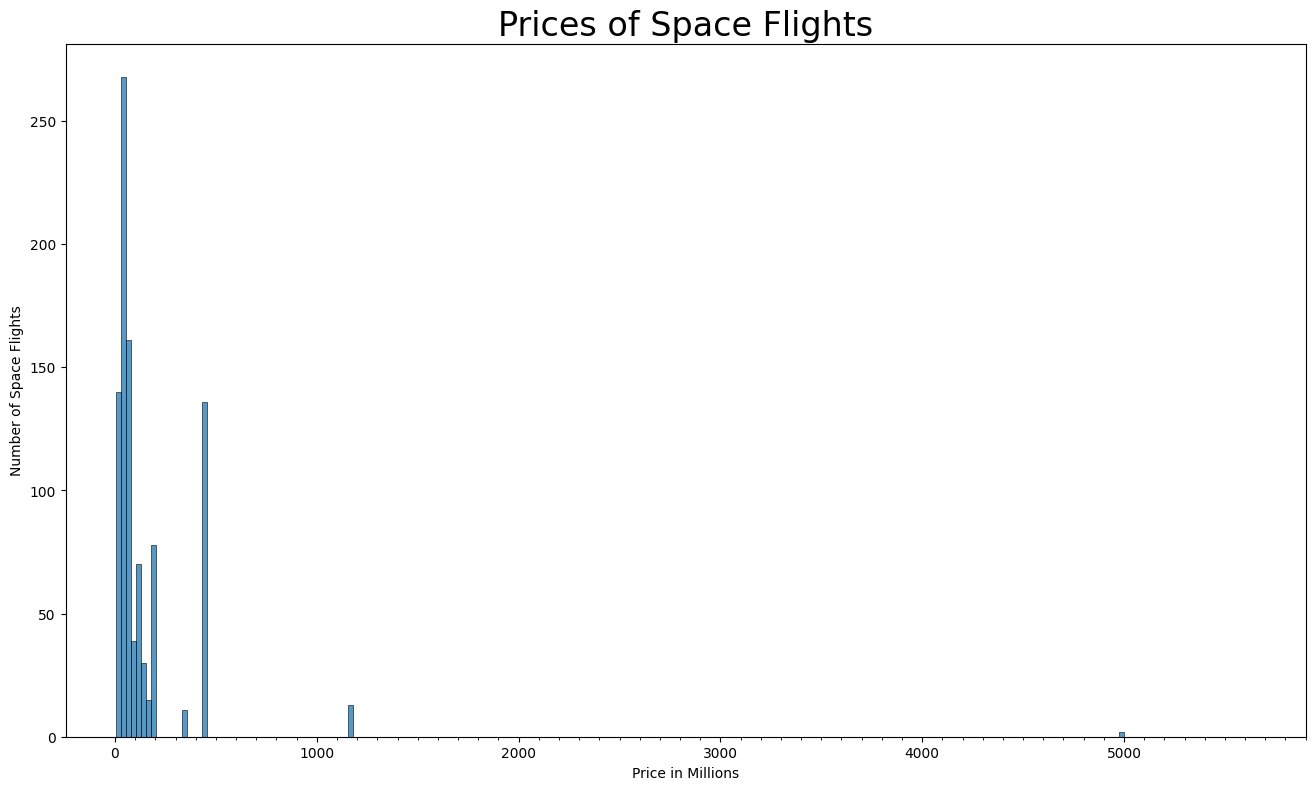

In [25]:
plt.figure(figsize=(16, 9))
sns.histplot(
    data=prices,
    x=prices.values,
    bins=200,
)

plt.title("Prices of Space Flights", fontsize=24)
plt.xlabel("Price in Millions")
plt.ylabel("Number of Space Flights")

# draw ticks for better visualization
major_ticks = [n * 1000 for n in range(6)]
minor_ticks = [n * 100 for n in range(60)]

plt.xticks(major_ticks)
plt.gca().set_xticks(minor_ticks, minor=True)

plt.show()

## Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [26]:
df_data["ISO_code"] = df_data["Location"].str.split(", ").str[-1]

In [27]:
country_name_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    # These where are additional places you have to account for
    'Iran' : 'Iran, Islamic Republic of',
    'South Korea' : 'Korea, Republic of',
    'North Korea' : 'Korea, Democratic People\'s Republic of',
    'Pacific Ocean' : 'Kiribati'
}

df_data["ISO_code"] = df_data["ISO_code"].replace(country_name_mapping)

df_data["ISO_code"]

0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Name: ISO_code, Length: 4323, dtype: object

In [28]:
df_data["ISO_code"] = df_data["ISO_code"].apply(lambda x: countries.get(x).alpha3)

df_data["ISO_code"]

0       USA
1       CHN
2       USA
3       KAZ
4       USA
       ... 
4319    USA
4320    USA
4321    USA
4322    KAZ
4323    KAZ
Name: ISO_code, Length: 4323, dtype: object

In [29]:
df_countries = df_data["ISO_code"].value_counts()

df_countries

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     268
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: ISO_code, dtype: int64

In [43]:
world_map = px.choropleth(df_countries,
                          locations=df_countries.index,
                          color=df_countries.values, 
                          hover_name=df_countries.index, 
                          color_continuous_scale=px.colors.sequential.YlOrRd)
 
world_map.update_layout(coloraxis_showscale=True)
 
world_map.show()

## Use a Choropleth Map to Show the Number of Failures by Country

In [31]:
df_mission_failures = df_data.query("Mission_Status == 'Failure'")["ISO_code"].value_counts()

df_mission_failures

USA    129
KAZ     72
RUS     63
CHN     19
FRA     13
JPN     10
IRN      8
IND      8
KIR      3
PRK      3
AUS      3
NZL      2
KOR      2
ISR      2
BRA      2
Name: ISO_code, dtype: int64

In [32]:
world_map = px.choropleth(df_mission_failures,
                          locations=df_mission_failures.index,
                          color=df_mission_failures.values, 
                          hover_name=df_mission_failures.index, 
                          color_continuous_scale=px.colors.sequential.Reds)
 
world_map.update_layout(coloraxis_showscale=True)
 
world_map.show()

## Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [33]:
df_burst_chart = df_data.groupby(by=['ISO_code', 'Organisation', 'Mission_Status'], as_index=False).agg({'Detail' : pd.Series.count})

In [34]:
burst = px.sunburst(df_burst_chart, 
                    path=['ISO_code', 'Organisation', 'Mission_Status'], 
                    values='Detail',
                    title='Sunburst of Countries, Organisation and Mission Status',
                   )
 
burst.show()

## Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [35]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [36]:
df_money_spent_by_org = df_data.groupby(by=['Organisation'], as_index=False).agg({'Price' : pd.Series.sum})

# remove Companies that have the prices at 0 (That means that all of their money spent is unaccounted for)
df_money_spent_by_org = df_money_spent_by_org[df_money_spent_by_org["Price"] != 0]

df_money_spent_by_org

,Organisation,Price
3,Arianespace,"16,345.00"
6,Boeing,"1,241.00"
7,CASC,"6,310.51"
12,EER,20.00
13,ESA,37.00
14,Eurockot,543.40
15,ExPace,28.30
19,ILS,"1,320.00"
23,ISRO,"2,177.00"
24,JAXA,168.00


In [37]:
fig = px.bar(df_money_spent_by_org,
             df_money_spent_by_org["Organisation"],
             df_money_spent_by_org["Price"])

fig.show()

## Analyse the Amount of Money Spent by Organisation per Launch

## Chart the Number of Launches per Year

In [38]:
df_data["Date"]

0       Fri Aug 07, 2020 05:12 UTC
1       Thu Aug 06, 2020 04:01 UTC
2       Tue Aug 04, 2020 23:57 UTC
3       Thu Jul 30, 2020 21:25 UTC
4       Thu Jul 30, 2020 11:50 UTC
                   ...            
4319    Wed Feb 05, 1958 07:33 UTC
4320    Sat Feb 01, 1958 03:48 UTC
4321    Fri Dec 06, 1957 16:44 UTC
4322    Sun Nov 03, 1957 02:30 UTC
4323    Fri Oct 04, 1957 19:28 UTC
Name: Date, Length: 4323, dtype: object

In [39]:
pd.to_datetime(df_data["Date"])
# Notice that the dtype is still object so we have to convert it another way

0       2020-08-07 05:12:00+00:00
1       2020-08-06 04:01:00+00:00
2       2020-08-04 23:57:00+00:00
3       2020-07-30 21:25:00+00:00
4       2020-07-30 11:50:00+00:00
                  ...            
4319    1958-02-05 07:33:00+00:00
4320    1958-02-01 03:48:00+00:00
4321    1957-12-06 16:44:00+00:00
4322    1957-11-03 02:30:00+00:00
4323    1957-10-04 19:28:00+00:00
Name: Date, Length: 4323, dtype: object

In [40]:
no_of_launches_per_year = df_data["Date"].apply(pd.to_datetime, utc=True)

no_of_launches_per_year = no_of_launches_per_year.dt.year.value_counts().sort_index(ascending=True)

no_of_launches_per_year

1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Date, Length: 64, dtype: int64

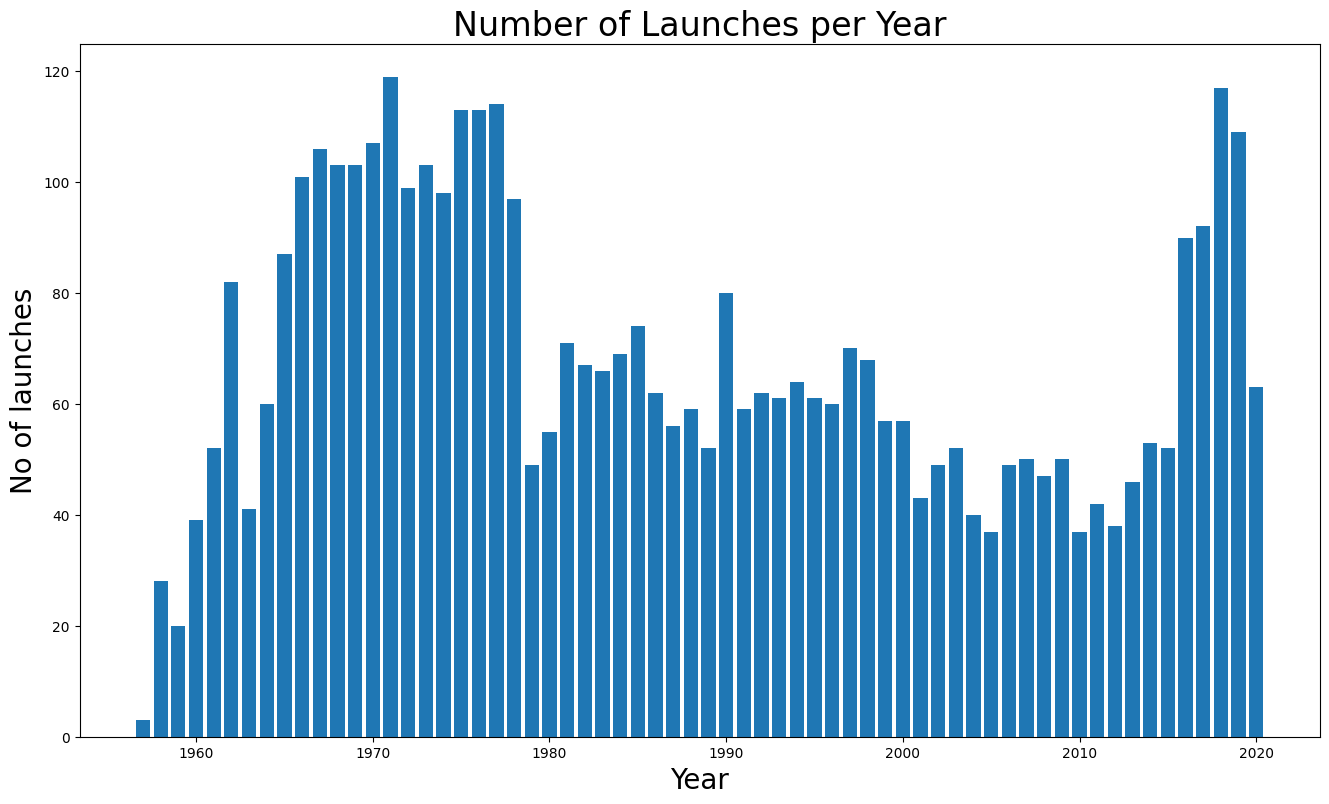

In [41]:
plt.figure(figsize=(16, 9))

plt.xlabel("Year", fontsize=20)
plt.ylabel("No of launches", fontsize=20)

plt.title("Number of Launches per Year", fontsize=24)

# # Add values inside the bars
# for index, value in enumerate(no_of_launches_per_year):
#     plt.text(x=value, y=index, s=value, ha='left', va='center')

plt.bar(no_of_launches_per_year.index, no_of_launches_per_year.values)

plt.show()

## Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

## Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

## How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

## Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

## Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

## For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020

Do the results change if we only look at the number of successful launches? 

## Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 